# Monte Carlo & Ensemble Methods

# Monte Carlo Basics
Definition: A method that uses repeated random sampling to estimate results.

Key Idea: If we can model the system and sample many random scenarios, the average outcome will approach the truth.

Example flow:

Define the problem in a way that allows randomness.

Simulate many times.

Average the results.

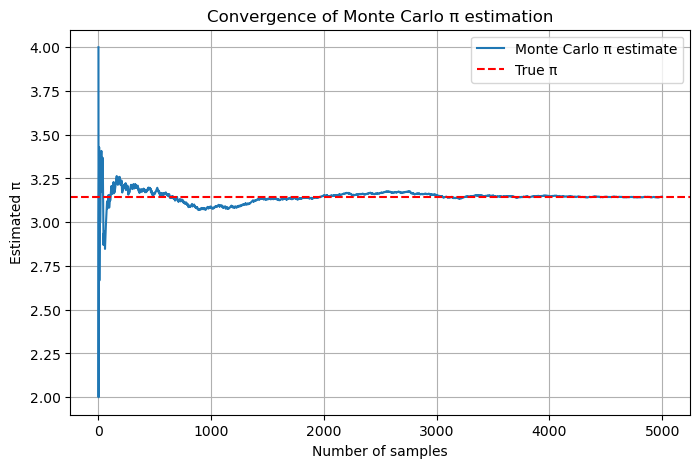

In [1]:
import random
import math
import statistics
import matplotlib.pyplot as plt

# 1. Monte Carlo estimation of Pi with convergence plot
def estimate_pi_progress(n_samples=10000):
    inside_circle = 0
    estimates = []
    for i in range(1, n_samples+1):
        x, y = random.random(), random.random()
        if x**2 + y**2 <= 1:
            inside_circle += 1
        estimates.append((inside_circle / i) * 4)
    return estimates

pi_estimates = estimate_pi_progress(5000)

plt.figure(figsize=(8,5))
plt.plot(pi_estimates, label="Monte Carlo π estimate")
plt.axhline(math.pi, color="red", linestyle="--", label="True π")
plt.xlabel("Number of samples")
plt.ylabel("Estimated π")
plt.title("Convergence of Monte Carlo π estimation")
plt.legend()
plt.grid(True)
plt.show()


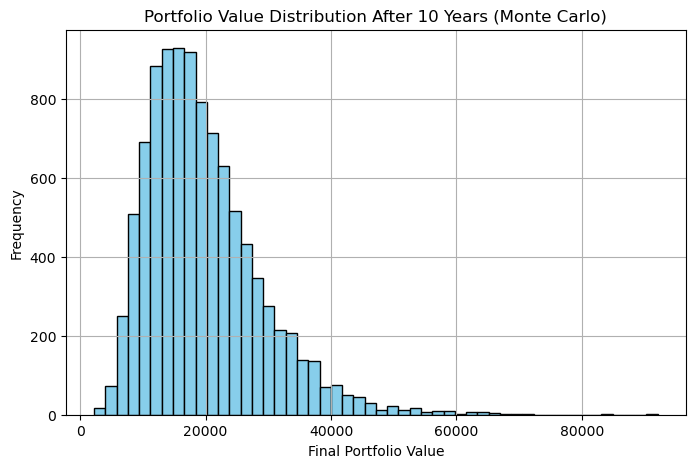

In [2]:
# 2. Risk simulation for a portfolio
def simulate_portfolio_distribution(initial_value=10000, mean_return=0.07, std_dev=0.15, years=10, trials=10000):
    final_values = []
    for _ in range(trials):
        value = initial_value
        for _ in range(years):
            yearly_return = random.gauss(mean_return, std_dev)
            value *= (1 + yearly_return)
        final_values.append(value)
    return final_values

portfolio_results = simulate_portfolio_distribution()

plt.figure(figsize=(8,5))
plt.hist(portfolio_results, bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Final Portfolio Value")
plt.ylabel("Frequency")
plt.title("Portfolio Value Distribution After 10 Years (Monte Carlo)")
plt.grid(True)
plt.show()

# Ensemble Methods

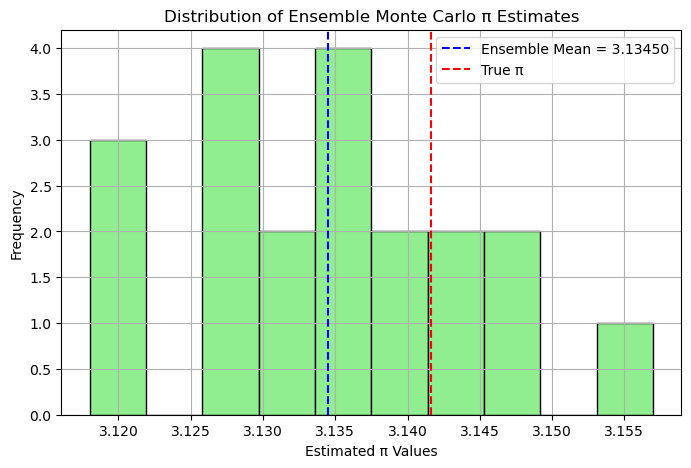

In [3]:
# 3. Ensemble π estimation using multiple runs
def pi_once(n=100000):
    inside_circle = 0
    for _ in range(n):
        x, y = random.random(), random.random()
        if x**2 + y**2 <= 1:
            inside_circle += 1
    return (inside_circle / n) * 4

ensemble_results = [pi_once(20000) for _ in range(20)]
ensemble_mean = statistics.mean(ensemble_results)

plt.figure(figsize=(8,5))
plt.hist(ensemble_results, bins=10, color='lightgreen', edgecolor='black')
plt.axvline(ensemble_mean, color='blue', linestyle='--', label=f"Ensemble Mean = {ensemble_mean:.5f}")
plt.axvline(math.pi, color='red', linestyle='--', label="True π")
plt.xlabel("Estimated π Values")
plt.ylabel("Frequency")
plt.title("Distribution of Ensemble Monte Carlo π Estimates")
plt.legend()
plt.grid(True)
plt.show()